In [1]:
## ======================================================================
#            Importing the necessary modules and tools
## ======================================================================

import pandas as pd; import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

# Import GradientBoostingRegressor
from sklearn.ensemble import GradientBoostingRegressor


# Import GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingClassifier

# from sklearn.metrics import necessary metrics
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import roc_auc_score , accuracy_score
from sklearn.metrics import classification_report, confusion_matrix

# Preprocessing tools
from sklearn.preprocessing import MinMaxScaler


# Set notebook options
# --------------------
pd.options.display.float_format = '{:,.3f}'.format
%matplotlib inline

In [2]:
url = "https://raw.githubusercontent.com/DrSaadLa/PythonTuts/main/TreeBasedModels/loan_data.csv"
loan = pd.read_csv(url)

In [3]:
print("*" * 50)
print(loan.info())
print("*" * 50)

**************************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB
None
*******

In [4]:
print("*" * 50)
print(loan.head())
print("*" * 50)
print(loan.tail())
print("*" * 50)

**************************************************
   credit.policy             purpose  int.rate  installment  log.annual.inc  \
0              1  debt_consolidation     0.119      829.100          11.350   
1              1         credit_card     0.107      228.220          11.082   
2              1  debt_consolidation     0.136      366.860          10.373   
3              1  debt_consolidation     0.101      162.340          11.350   
4              1         credit_card     0.143      102.920          11.300   

     dti  fico  days.with.cr.line  revol.bal  revol.util  inq.last.6mths  \
0 19.480   737          5,639.958      28854      52.100               0   
1 14.290   707          2,760.000      33623      76.700               0   
2 11.630   682          4,710.000       3511      25.600               1   
3  8.100   712          2,699.958      33667      73.200               1   
4 14.970   667          4,066.000       4740      39.500               0   

   delinq.2yrs  p

In [5]:
print("*" * 50)
print(loan.columns)
print("*" * 50)

**************************************************
Index(['credit.policy', 'purpose', 'int.rate', 'installment', 'log.annual.inc',
       'dti', 'fico', 'days.with.cr.line', 'revol.bal', 'revol.util',
       'inq.last.6mths', 'delinq.2yrs', 'pub.rec', 'not.fully.paid'],
      dtype='object')
**************************************************


In [12]:
print("*" * 50)
loan.describe().T


**************************************************


,count,mean,std,min,25%,50%,75%,max
credit.policy,"9,578.000",0.805,0.396,0.000,1.000,1.000,1.000,1.000
int.rate,"9,578.000",0.123,0.027,0.060,0.104,0.122,0.141,0.216
installment,"9,578.000",319.089,207.071,15.670,163.770,268.950,432.762,940.140
log.annual.inc,"9,578.000",10.932,0.615,7.548,10.558,10.929,11.291,14.528
dti,"9,578.000",12.607,6.884,0.000,7.213,12.665,17.950,29.960
fico,"9,578.000",710.846,37.971,612.000,682.000,707.000,737.000,827.000
days.with.cr.line,"9,578.000","4,560.767","2,496.930",178.958,"2,820.000","4,139.958","5,730.000","17,639.958"
revol.bal,"9,578.000","16,913.964","33,756.190",0.000,"3,187.000","8,596.000","18,249.500","1,207,359.000"
revol.util,"9,578.000",46.799,29.014,0.000,22.600,46.300,70.900,119.000
inq.last.6mths,"9,578.000",1.577,2.200,0.000,0.000,1.000,2.000,33.000


In [13]:
loan.shape

(9578, 14)

In [14]:
loan.isnull().sum()

credit.policy        0
purpose              0
int.rate             0
installment          0
log.annual.inc       0
dti                  0
fico                 0
days.with.cr.line    0
revol.bal            0
revol.util           0
inq.last.6mths       0
delinq.2yrs          0
pub.rec              0
not.fully.paid       0
dtype: int64

In [15]:
loan.drop("purpose", axis = 1, inplace = True)

In [16]:
loan.shape

(9578, 13)

In [22]:
loan["credit.policy"].value_counts()

1    7710
0    1868
Name: credit.policy, dtype: int64

In [23]:
loan["credit.policy"].unique()

array([1, 0], dtype=int64)

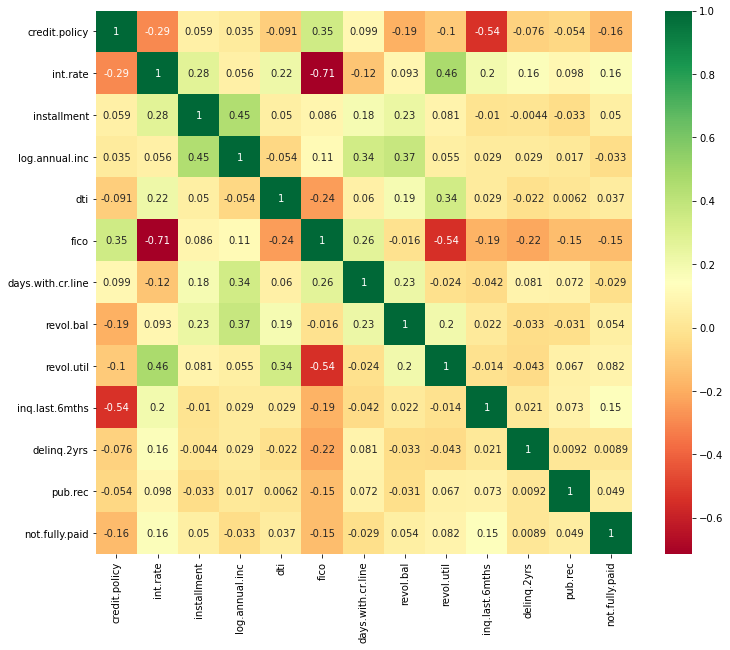

In [41]:

#     The Correlation Matrix 

plt.figure(figsize=(12,10))
p=sns.heatmap(loan.corr(), annot=True, cmap ='RdYlGn')

In [28]:
X = loan.iloc[:,1:14]  
y = loan.iloc[:,0] 

In [29]:
X.head()

,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,0.119,829.100,11.350,19.480,737,"5,639.958",28854,52.100,0,0,0,0
1,0.107,228.220,11.082,14.290,707,"2,760.000",33623,76.700,0,0,0,0
2,0.136,366.860,10.373,11.630,682,"4,710.000",3511,25.600,1,0,0,0
3,0.101,162.340,11.350,8.100,712,"2,699.958",33667,73.200,1,0,0,0
4,0.143,102.920,11.300,14.970,667,"4,066.000",4740,39.500,0,1,0,0


In [30]:
# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.30,
                                                    random_state=42, 
                                                    stratify= y)

In [31]:
# Fitting the Gradient Boosting Classifier
from sklearn.ensemble import GradientBoostingClassifier
gb_model = GradientBoostingClassifier() 
gb_model.fit(X_train, y_train)


y_pred_gb = gb_model.predict(X_test)

print(classification_report(y_test, y_pred_gb))


conf_matrix = confusion_matrix(y_test, y_pred_gb)

              precision    recall  f1-score   support

           0       0.99      0.94      0.97       561
           1       0.99      1.00      0.99      2313

    accuracy                           0.99      2874
   macro avg       0.99      0.97      0.98      2874
weighted avg       0.99      0.99      0.99      2874



Text(0.5, 15.0, 'Predicted label')

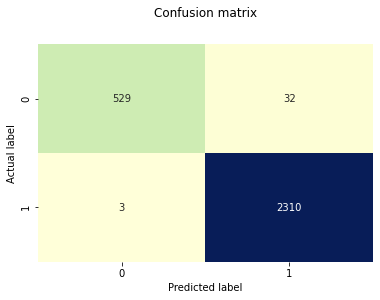

In [43]:

##      Plotting the Confusion Matrix 

cm = confusion_matrix(y_test, y_pred_gb)
_ = sns.heatmap(pd.DataFrame(cm),
                annot = True, 
                cmap = "YlGnBu",
                fmt = 'g',
                cbar = False)

plt.title('Confusion matrix', y = 1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [32]:
print("*"*50)
print("The GB Accuracy score: {:0.4f}".format(accuracy_score(y_test, y_pred_gb)))
print("The GB Area Under ROC: {:0.4f}".format(roc_auc_score(y_test, y_pred_gb)))
print("*"*50)

**************************************************
The GB Accuracy score: 0.9878
The GB Area Under ROC: 0.9708
**************************************************


In [33]:
# fitting gradient bbosting model with some parameters 
gb_mod = GradientBoostingClassifier(max_depth=4, 
                                   n_estimators= 250,
                                   random_state=42)

gb_mod.fit(X_train, y_train)

y_pred_proba = gb_mod.predict_proba(X_test)[:, 1]

y_pred_gb_mod = gb_mod.predict(X_test)

gb_roc_auc = roc_auc_score(y_test, y_pred_proba)

print("*"*50)
print("The GBM Accuracy score: {:0.4f}".format(accuracy_score(y_test, y_pred_gb_mod)))
print("The GBM Area Under ROC: {:0.4f}".format(gb_roc_auc))
print("*"*50)

**************************************************
The GBM Accuracy score: 0.9913
The GBM Area Under ROC: 0.9976
**************************************************


In [37]:
#  Gradient boosting classifier with hyper parameter tuning
from sklearn.model_selection import GridSearchCV
gbm_grid = {
    "n_estimators":[100,150,200],
    "learning_rate": [0.05, 0.1, 0.3, 0.5, 0.7, 1],
    "max_depth":[3, 5, 6],
    "max_features":["log2","sqrt"],
    }
grid_gb = GridSearchCV(
            estimator=GradientBoostingClassifier(random_state=42),
            param_grid= gbm_grid,
            cv=5, 
            verbose = 1)
grid_gb.fit(X_train, y_train)

Fitting 5 folds for each of 108 candidates, totalling 540 fits


GridSearchCV(cv=5, estimator=GradientBoostingClassifier(random_state=42),
             param_grid={'learning_rate': [0.05, 0.1, 0.3, 0.5, 0.7, 1],
                         'max_depth': [3, 5, 6],
                         'max_features': ['log2', 'sqrt'],
                         'n_estimators': [100, 150, 200]},
             verbose=1)

In [39]:
print("*"*50)
for hyper_name, val in grid_gb.best_params_.items():
    print("{0:18}: {1}".format(hyper_name, val))


print("*"*50)
print('The best achieved score: {:.5f}'.format(grid_gb.best_score_))
print("*"*50)

**************************************************
learning_rate     : 0.3
max_depth         : 3
max_features      : log2
n_estimators      : 200
**************************************************
The best achieved score: 0.99284
**************************************************


In [40]:
# Training the best classifier
# --------------------------
best_clf = GradientBoostingClassifier(
              random_state=42,
              learning_rate=0.3, 
              max_depth=3,
              max_features="log2", 
              n_estimators=200)

# ------------------------
best_clf.fit(X_train, y_train)


# ----------------

best_preds = best_clf.predict(X_test)

print("The Gradient Boosting Classification report".center(60))
print("*"*50)
print(classification_report(y_test, best_preds))
print("*"*50)

        The Gradient Boosting Classification report         
**************************************************
              precision    recall  f1-score   support

           0       0.99      0.96      0.97       561
           1       0.99      1.00      0.99      2313

    accuracy                           0.99      2874
   macro avg       0.99      0.98      0.98      2874
weighted avg       0.99      0.99      0.99      2874

**************************************************
